In [6]:
!pip install kaggle

In [7]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


Importing Face Mask Dataset

In [8]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 157M/163M [00:02<00:00, 63.1MB/s]
100% 163M/163M [00:02<00:00, 80.3MB/s]


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

 data   face-mask-dataset.zip   kaggle.json  '~p'   sample_data


Importing the libraries

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1473.jpg', 'with_mask_1377.jpg', 'with_mask_73.jpg', 'with_mask_53.jpg', 'with_mask_2954.jpg']
['with_mask_259.jpg', 'with_mask_741.jpg', 'with_mask_2130.jpg', 'with_mask_2544.jpg', 'with_mask_1863.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1920.jpg', 'without_mask_1720.jpg', 'without_mask_3018.jpg', 'without_mask_3326.jpg', 'without_mask_3803.jpg']
['without_mask_1424.jpg', 'without_mask_1414.jpg', 'without_mask_1940.jpg', 'without_mask_3654.jpg', 'without_mask_3225.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

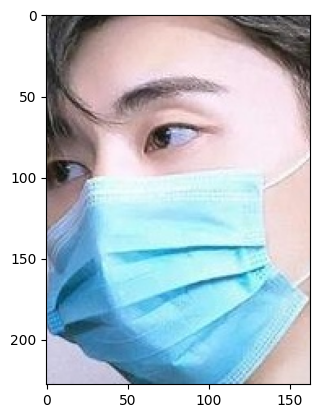

In [19]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

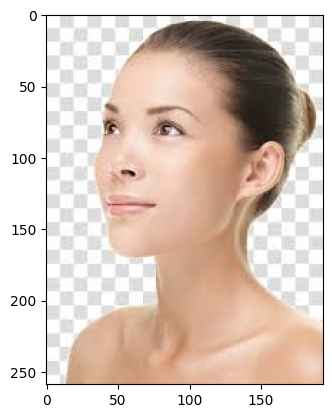

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [21]:
#convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
len(data)

7553

In [23]:
data[1]

array([[[49, 29, 22],
        [46, 27, 18],
        [49, 25, 18],
        ...,
        [53, 32, 24],
        [54, 31, 25],
        [52, 29, 23]],

       [[49, 26, 20],
        [51, 28, 19],
        [53, 30, 20],
        ...,
        [53, 32, 24],
        [54, 31, 25],
        [53, 30, 24]],

       [[53, 28, 21],
        [57, 32, 22],
        [61, 35, 26],
        ...,
        [54, 33, 25],
        [55, 32, 26],
        [54, 31, 25]],

       ...,

       [[58, 38, 26],
        [60, 40, 30],
        [52, 34, 24],
        ...,
        [ 6,  4,  7],
        [ 5,  5,  7],
        [ 6,  6,  8]],

       [[55, 35, 24],
        [59, 39, 28],
        [51, 33, 22],
        ...,
        [ 6,  4,  7],
        [ 5,  5,  7],
        [ 6,  6,  8]],

       [[57, 34, 26],
        [59, 39, 30],
        [52, 33, 24],
        ...,
        [ 6,  4,  7],
        [ 5,  5,  7],
        [ 6,  6,  8]]], dtype=uint8)

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
#scaling

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [32]:
X_train[1]

array([[[ 66,  70,  64],
        [ 88,  83,  69],
        [188, 169, 140],
        ...,
        [108, 109,  72],
        [127, 128,  91],
        [138, 139, 102]],

       [[ 92,  98,  88],
        [142, 140, 121],
        [198, 184, 150],
        ...,
        [147, 144, 108],
        [160, 153, 118],
        [156, 153, 115]],

       [[136, 142, 129],
        [160, 161, 138],
        [198, 188, 150],
        ...,
        [159, 151, 118],
        [165, 153, 118],
        [161, 154, 115]],

       ...,

       [[ 77,  92, 108],
        [ 68,  87, 112],
        [ 97, 114, 142],
        ...,
        [196, 107,  70],
        [176,  85,  56],
        [160,  60,  38]],

       [[150, 162, 167],
        [ 97, 111, 126],
        [ 96, 110, 130],
        ...,
        [186,  89,  56],
        [191, 103,  64],
        [170,  81,  42]],

       [[188, 196, 196],
        [156, 165, 173],
        [123, 133, 152],
        ...,
        [167,  65,  34],
        [189,  94,  56],
        [186, 100,  54]]

In [33]:
X_train_scaled[1]

array([[[0.25882353, 0.2745098 , 0.25098039],
        [0.34509804, 0.3254902 , 0.27058824],
        [0.7372549 , 0.6627451 , 0.54901961],
        ...,
        [0.42352941, 0.42745098, 0.28235294],
        [0.49803922, 0.50196078, 0.35686275],
        [0.54117647, 0.54509804, 0.4       ]],

       [[0.36078431, 0.38431373, 0.34509804],
        [0.55686275, 0.54901961, 0.4745098 ],
        [0.77647059, 0.72156863, 0.58823529],
        ...,
        [0.57647059, 0.56470588, 0.42352941],
        [0.62745098, 0.6       , 0.4627451 ],
        [0.61176471, 0.6       , 0.45098039]],

       [[0.53333333, 0.55686275, 0.50588235],
        [0.62745098, 0.63137255, 0.54117647],
        [0.77647059, 0.7372549 , 0.58823529],
        ...,
        [0.62352941, 0.59215686, 0.4627451 ],
        [0.64705882, 0.6       , 0.4627451 ],
        [0.63137255, 0.60392157, 0.45098039]],

       ...,

       [[0.30196078, 0.36078431, 0.42352941],
        [0.26666667, 0.34117647, 0.43921569],
        [0.38039216, 0

Building a CNN

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
#training the neural network
history = model.fit(X_train_scaled,Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 27ms/step - loss: 0.4398 - acc: 0.8135 - val_loss: 0.2432 - val_acc: 0.9074
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2658 - acc: 0.8924 - val_loss: 0.2147 - val_acc: 0.9157
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2243 - acc: 0.9170 - val_loss: 0.1797 - val_acc: 0.9306
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1720 - acc: 0.9332 - val_loss: 0.1613 - val_acc: 0.9405
Epoch 5/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1302 - acc: 0.9498 - val_loss: 0.2015 - val_acc: 0.9256


Model Evaluation

In [40]:
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 9ms/step - loss: 0.2018 - acc: 0.9239
Test Accuracy = 0.9238914847373962


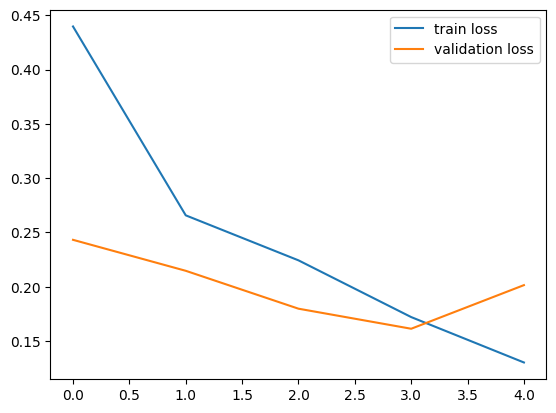

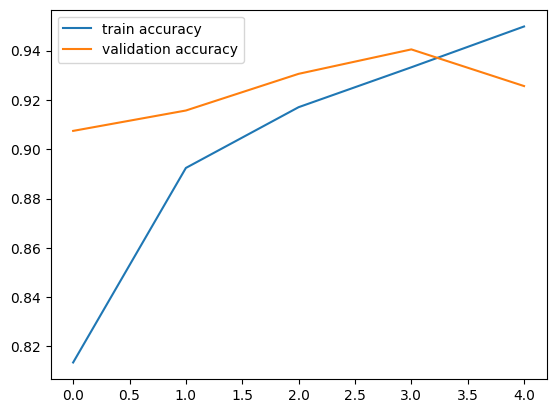

In [41]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/test1.png


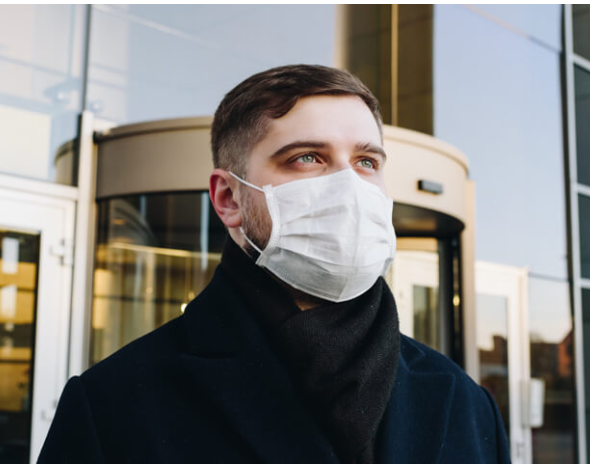

1/1 [==============================] - 0s 21ms/step
[[0.27433848 0.6270511 ]]
1
The person in the image is wearing a mask


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')